In [21]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')


In [22]:
import pandas as pd
import numpy as np
#for visualization
import seaborn as sns
#text cleaning package
import neattext.functions as nfx
#we are using linear regression to make this model
from sklearn.linear_model import LogisticRegression
# 
from sklearn.naive_bayes import MultinomialNB
#transormers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
#loading dataset
dataset = pd.read_csv('emotion_dataset_raw.csv')
dataset.head(5)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [24]:
#value count
dataset['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

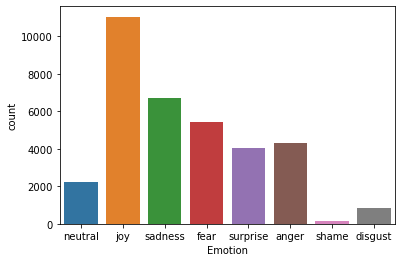

In [25]:
#plot
sns.countplot(x='Emotion',data=dataset)

In [26]:
#below are are the packages we can use to do data cleaning ot text preprocessing
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [27]:
#using code helps to remove userhandles and with that appending a new column 'clean text' with doesnot contain unwanted text
#this new column will be added to the dataset
dataset['clean_text']=dataset['Text'].apply(nfx.remove_userhandles)

In [28]:
#removing stopwords
dataset['clean_text']=dataset['Text'].apply(nfx.remove_stopwords)

In [29]:
dataset.head(5)

,Emotion,Text,clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe.. hugggzzz u .! babe n...


In [30]:
#Feature and labels
X = dataset['clean_text']
Y=  dataset['Emotion']

In [31]:
#Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [32]:
#building the model
#creating a pipeline
from sklearn.pipeline import Pipeline
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [33]:
#creating a Logistic Regression pipline
# in the pipeline we are going to take in the vectorizer and the estimators
pipe_LR = Pipeline(steps=[('cv',CountVectorizer()),('lr',log_reg)])

In [34]:
#train and fit
pipe_LR.fit(x_train,y_train)



Pipeline(steps=[('cv', CountVectorizer()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [35]:
#check Accuracy
pipe_LR.score(x_test,y_test)

0.59495580944169

In [36]:
#prediction
example1 = 'i scored a wining goal at anfield,i am so happy'

In [37]:
pipe_LR.predict([example1])

array(['joy'], dtype=object)

In [38]:
#prediction prob
pipe_LR.predict_proba([example1])

array([[0.005515  , 0.04871383, 0.00371249, 0.70333177, 0.02466857,
        0.03843649, 0.00124025, 0.17438161]])

In [39]:
pipe_LR.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [40]:
#saving the model in the pipeline
import joblib #Joblib is a set of tools to provide lightweight pipelining in Python
pipeline_file = open("emotion_classifier_pipe_LR_01_january_2022.pkl","wb")
joblib.dump(pipe_LR,pipeline_file)
pipeline_file.close()